## 6.5 Machine Learning Part 

### This script contains the following:

#### 1. Importing libraries and data and renaming column
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming column

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\shyro\OneDrive\Documents\2. Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\King County House Sales'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_new_var.csv'))

In [5]:
df.shape

(21599, 25)

In [6]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price category,has_basement,distance_to_city
0,0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Middle tier,0,10.458148
1,1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,High tier,1,6.796267
2,2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Low tier,0,13.601613
3,3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,High tier,1,8.402784
4,4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,High tier,0,32.210221


In [7]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'Unnamed: 0' : 'No'}, inplace = True)

In [8]:
df.head()

,No,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price category,has_basement,distance_to_city
0,0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Middle tier,0,10.458148
1,1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,High tier,1,6.796267
2,2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Low tier,0,13.601613
3,3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,High tier,1,8.402784
4,4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,High tier,0,32.210221


In [9]:
df2 = df.drop(['No','id','date','Price category','floors','sqft_lot15','has_basement'],axis=1)

In [10]:
#create a price per sqft column

df2['price_per_sqft'] = df2['price'].div(df2['sqft_living'])

In [11]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,distance_to_city,price_per_sqft
0,221900,3,1.00,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,10.458148,188.050847
1,538000,3,2.25,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,6.796267,209.338521
2,180000,2,1.00,770,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,13.601613,233.766234
3,604000,4,3.00,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,8.402784,308.163265
4,510000,3,2.00,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,32.210221,303.571429


# 2. The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shyro\anaconda3\lib\site-packages\sklearn\clust

[-2951948946204019.0,
 -1390770664367456.5,
 -767402313041050.2,
 -497302330210629.4,
 -360822695522540.44,
 -274208329949491.97,
 -217188960927654.97,
 -172297452311413.0,
 -146913310034622.16]

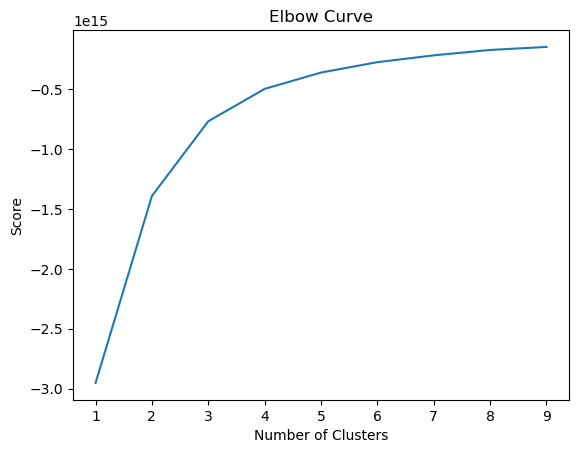

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [16]:
# Fit the k-means object to the data.

kmeans.fit(df2)

C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [17]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,distance_to_city,price_per_sqft,clusters
0,221900,3,1.00,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,10.458148,188.050847,0
1,538000,3,2.25,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,6.796267,209.338521,3
2,180000,2,1.00,770,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,13.601613,233.766234,0
3,604000,4,3.00,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,8.402784,308.163265,3
4,510000,3,2.00,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,32.210221,303.571429,0


In [19]:
df2['clusters'].value_counts()

0    12927
3     7255
1     1227
2      190
Name: clusters, dtype: int64

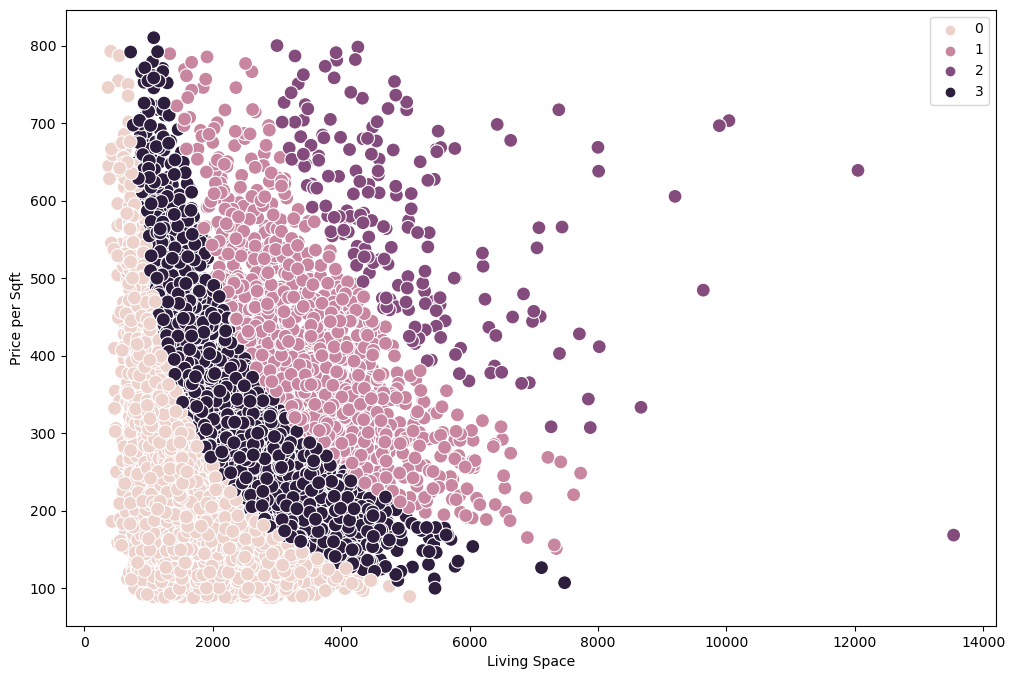

In [20]:
# Plot the clusters for the "price_per_sqft" and "sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df2['price_per_sqft'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Living Space') # Label x-axis.
plt.ylabel('Price per Sqft') # Label y-axis.
plt.show()

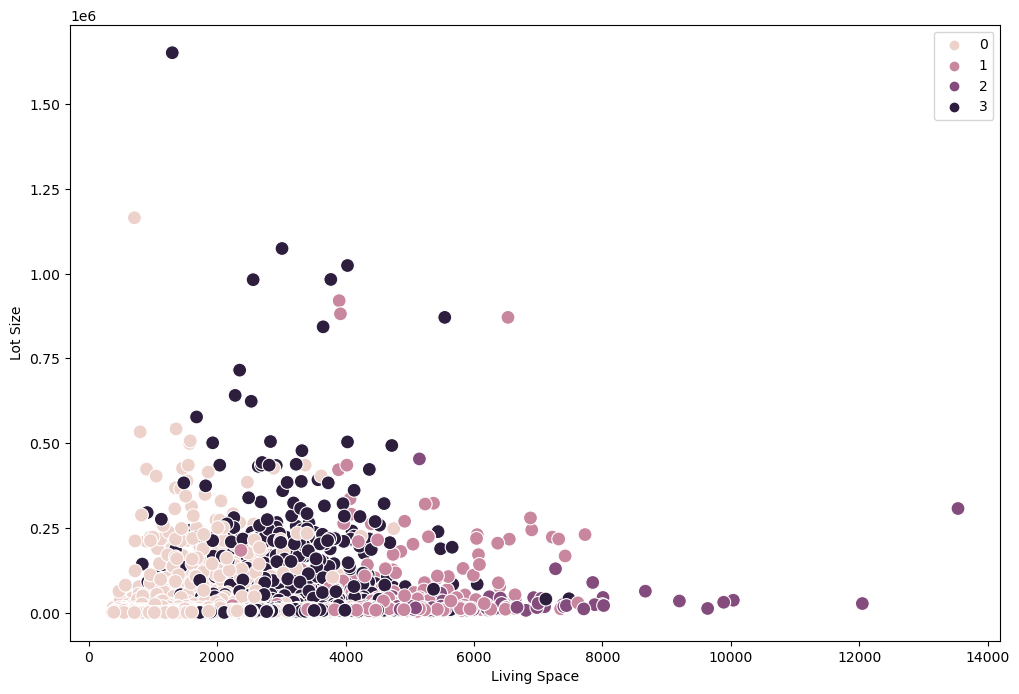

In [21]:
# Plot the clusters for the "sqft_living" and "sqft_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df2['sqft_lot'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Living Space') # Label x-axis.
plt.ylabel('Lot Size') # Label y-axis.
plt.show()

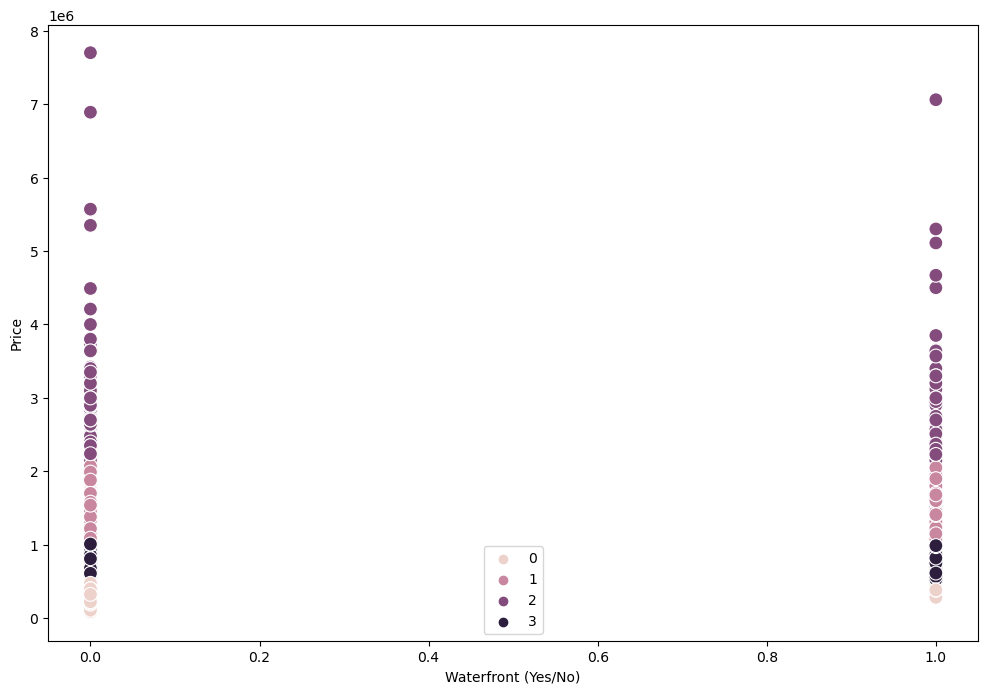

In [22]:
# Plot the clusters for the "waterfront" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['waterfront'], y=df2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Waterfront (Yes/No)') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

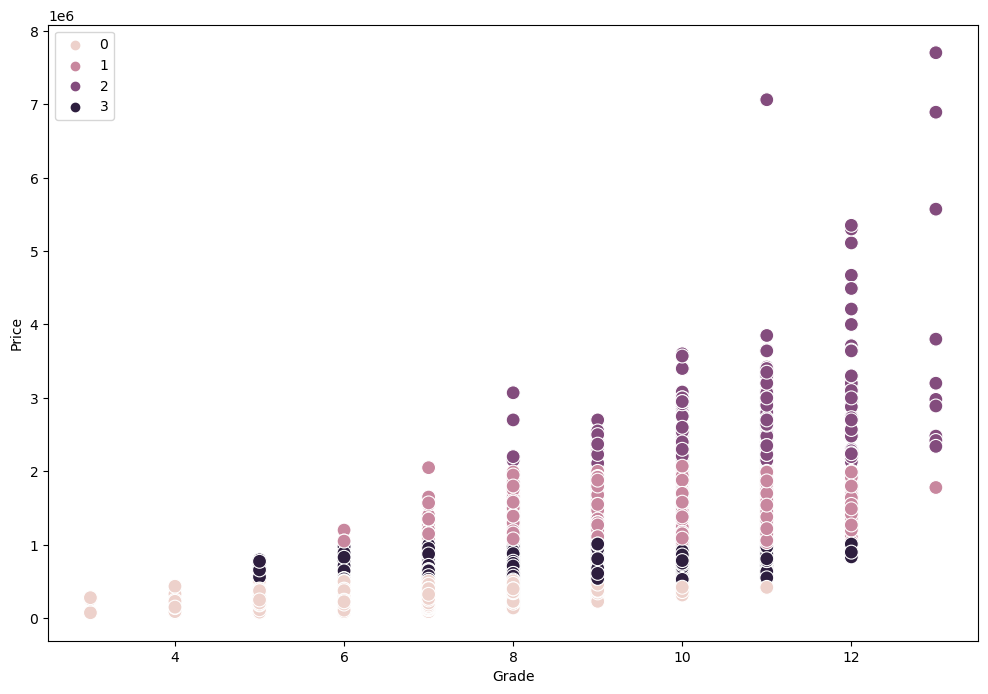

In [23]:
# Plot the clusters for the "grade" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['grade'], y=df2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Grade') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

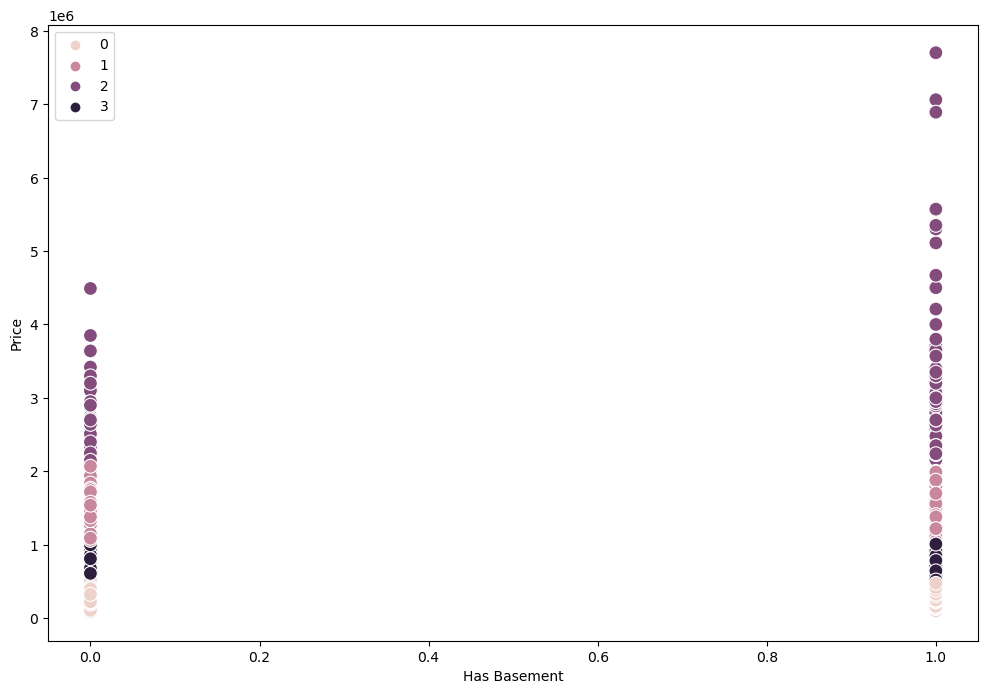

In [24]:
# Plot the clusters for the "grade" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['has_basement'], y=df2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Has Basement') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

In [25]:
df2.loc[df2['clusters'] == 3, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'medium purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
df2.groupby('cluster').agg({'sqft_living':['mean', 'median'], 
                         'waterfront':['mean', 'median'], 
                         'grade':['mean', 'median'],
                          'price_per_sqft':['mean', 'median'],
                          'price':['mean', 'median']})

sqft_living         waterfront             grade         \
                      mean  median       mean median       mean median   
cluster                                                                  
dark purple    2456.486423  2400.0   0.006065    0.0   8.188284    8.0   
medium purple  5094.152632  4730.0   0.236842    0.0  10.752632   11.0   
pink           1677.377427  1600.0   0.001160    0.0   7.126170    7.0   
purple         3631.536267  3530.0   0.048085    0.0   9.637327   10.0   

              price_per_sqft                     price             
                        mean      median          mean     median  
cluster                                                            
dark purple       303.793548  282.738095  6.894148e+05   660000.0  
medium purple     568.679903  572.842999  2.807000e+06  2530000.0  
pink              224.802644  203.125000  3.453655e+05   345000.0  
purple            397.305763  381.502890  1.360562e+06  1300000.0

In [27]:
# export actual and predicted dataframe to .csv

df2.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'cluster_group.csv'))